# **Instalação e importação de bibliotecas** 

In [1]:
#Instalar bibliotecas
!pip install fundamentus
!pip install yfinance
!pip install dtale
!pip install technical_indicators_lib
!pip install ta
!pip install yfinance
!pip install technical_indicators_lib
!pip install bioinfokit

In [2]:
#Importar pacotes
import fundamentus
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import dtale
import dtale.app as dtale_app
from sklearn.manifold import TSNE
import seaborn as sns 
from bioinfokit.visuz import cluster
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ta import add_all_ta_features
import technical_indicators_lib as ti
from sklearn import preprocessing
from ta.utils import dropna
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from scipy.stats import f_oneway
import warnings
from IPython.display import Image
from sklearn.cluster import KMeans #para usar o KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
import math
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

2021-05-13 12:09:46,688 [logging.log_init] INFO: LOGLEVEL=INFO


# **Importar dados**

In [9]:
info_papel_fit_no_missing_table = pd.read_csv('info_papel_fit_no_missing_table.csv')
df2 = info_papel_fit_no_missing_table
df2

,Unnamed: 0,Papel,Setor,Subsetor,Cotacao,Cres_Rec_5a,Div_Br_Patrim,Div_Bruta,Div_Liquida,Div_Yield,...,Marg_Bruta,Marg_Liquida,PEBIT,PL,PVP,ROE,ROIC,Valor_de_mercado,VPA,id
0,1,ABCB4,Intermediários Financeiros,Bancos,15.99,-34.3,NaN,NaN,NaN,3.1,...,NaN,0.0,NaN,10.97,0.82,7.5,NaN,3.532040e+09,19.41,3
1,2,ABEV3,Bebidas,Cervejas e Refrigerantes,14.69,6.1,0.06,4.792230e+09,-1.399810e+10,3.3,...,53.6,20.1,16.82,20.31,3.13,15.4,15.6,2.311490e+11,4.69,4
2,3,ADHM3,NaN,NaN,1.56,43.5,NaN,0.000000e+00,0.000000e+00,0.0,...,100.0,-18860.6,-5.69,-4.09,-1.29,31.5,521.7,2.544050e+07,-1.21,5
3,4,AELP3,Energia Elétrica,Energia Elétrica,1.93,1.2,NaN,0.000000e+00,-9.130000e+06,0.0,...,0.5,-0.7,-12.58,8.49,-200.57,-2363.8,NaN,1.813180e+08,-0.01,6
4,5,AFLT3,Energia Elétrica,Energia Elétrica,8.96,7.9,0.00,7.390000e+05,-3.047000e+07,8.1,...,64.8,52.1,29.48,30.21,3.02,10.0,11.1,5.652420e+08,2.97,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,376,WHRL3,Utilidades Domésticas,Eletrodomésticos,6.90,-4.9,0.22,4.638460e+08,-1.558990e+09,17.6,...,18.6,6.8,13.78,17.02,4.90,28.8,37.0,1.036920e+10,1.41,395
374,377,WHRL4,Utilidades Domésticas,Eletrodomésticos,7.66,-4.9,0.22,4.638460e+08,-1.558990e+09,17.4,...,18.6,6.8,15.30,18.89,5.43,28.8,37.0,1.151130e+10,1.41,396
375,378,WLMM4,Comércio,Material de Transporte,30.20,27.4,0.03,1.330300e+07,-1.053720e+08,1.2,...,13.8,6.3,17.42,18.73,2.40,12.8,14.1,1.099720e+09,12.59,397
376,379,WSON33,Transporte,Serviços de Apoio e Armazenagem,44.48,1.3,1.11,2.683250e+09,2.048010e+09,6.8,...,48.0,5.7,4.32,33.56,1.31,3.9,15.1,3.167870e+09,33.87,398


# Pré- processamento dos dados

In [10]:
# Extrair indicadores fundamentalistas filtrados com os stakeholders
df_papeis_fit_new = df2[['Cres_Rec_5a', 'Div_Br_Patrim',
       'Div_Bruta', 'Div_Liquida', 'Div_Yield', 'EV_EBIT', 'EV_EBITDA', 'LPA',
       'Marg_Bruta', 'Marg_Liquida', 'PEBIT', 'PL', 'PVP', 'ROE', 'ROIC',
       'Valor_de_mercado', 'VPA']]

# Normalização
df_papeis_fit_norm = (df_papeis_fit_new-df_papeis_fit_new.min())/(df_papeis_fit_new.max()-df_papeis_fit_new.min())
df_papeis_fit_norm.fillna(value = 0, inplace = True)


df_papeis_fit_norm

,Cres_Rec_5a,Div_Br_Patrim,Div_Bruta,Div_Liquida,Div_Yield,EV_EBIT,EV_EBITDA,LPA,Marg_Bruta,Marg_Liquida,PEBIT,PL,PVP,ROE,ROIC,Valor_de_mercado,VPA
0,0.034318,0.000000,0.000000,0.000000,0.045058,0.000000,0.000000,0.415751,0.000000,0.638319,0.000000,0.803300,0.859686,0.832356,0.000000,0.006706,0.895843
1,0.079331,0.160865,0.012208,0.003509,0.047965,0.906968,0.020537,0.414656,0.892520,0.638527,0.546795,0.803715,0.869547,0.835129,0.108665,0.438859,0.891864
2,0.121003,0.000000,0.000000,0.044264,0.000000,0.906352,0.020249,0.413028,0.942242,0.443436,0.537833,0.802631,0.850679,0.840781,1.000000,0.000048,0.890269
3,0.073872,0.000000,0.000000,0.044237,0.000000,0.906173,0.020147,0.413931,0.835619,0.638312,0.535090,0.803190,0.000000,0.000000,0.000000,0.000344,0.890593
4,0.081337,0.160308,0.000002,0.044175,0.117733,0.907315,0.020803,0.414034,0.904522,0.638857,0.551835,0.804154,0.869077,0.833234,0.100740,0.001073,0.891399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.067075,0.162350,0.001182,0.039725,0.255814,0.906851,0.020500,0.414197,0.855015,0.638389,0.545584,0.803568,0.877102,0.839833,0.146354,0.019687,0.890977
374,0.067075,0.162350,0.001182,0.039725,0.252907,0.906894,0.020520,0.414197,0.855015,0.638389,0.546190,0.803651,0.879365,0.839833,0.146354,0.021855,0.890977
375,0.103064,0.160587,0.000034,0.043957,0.017442,0.906967,0.020591,0.415973,0.849871,0.638384,0.547034,0.803644,0.866430,0.834217,0.106023,0.002088,0.894000
376,0.073983,0.170612,0.006835,0.050226,0.098837,0.906719,0.020463,0.415558,0.886520,0.638378,0.541818,0.804303,0.861778,0.831093,0.107784,0.006014,0.899753


# Análise descritiva dos dados

In [11]:
# **Análise Descritiva dos dados**

dtale_app.USE_NGROK = True

d_tale_page  = dtale.show(df_papeis_fit_norm, ignore_duplicate=True)
d_tale_page

# Clusterização 

In [8]:
####### Para muitas colunas
pca_scores = PCA().fit_transform(df_papeis_fit_norm)

# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

tsne_em = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12, n_iter=2500, learning_rate=368, verbose=1).fit_transform(df_pc)

get_clusters = DBSCAN(eps=2.5, min_samples=10).fit_predict(tsne_em)
set(get_clusters)

# get t-SNE plot with colors assigned to each cluster
cluster.tsneplot(score=tsne_em, colorlist=get_clusters, 
    colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000'), 
    legendpos='upper right', legendanchor=(1.15, 1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 378 samples in 0.001s...
[t-SNE] Computed neighbors for 378 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 378 / 378
[t-SNE] Mean sigma: 0.032090
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.704971
[t-SNE] KL divergence after 2000 iterations: 0.406670


# Resultados da Clusterização DBSCAN

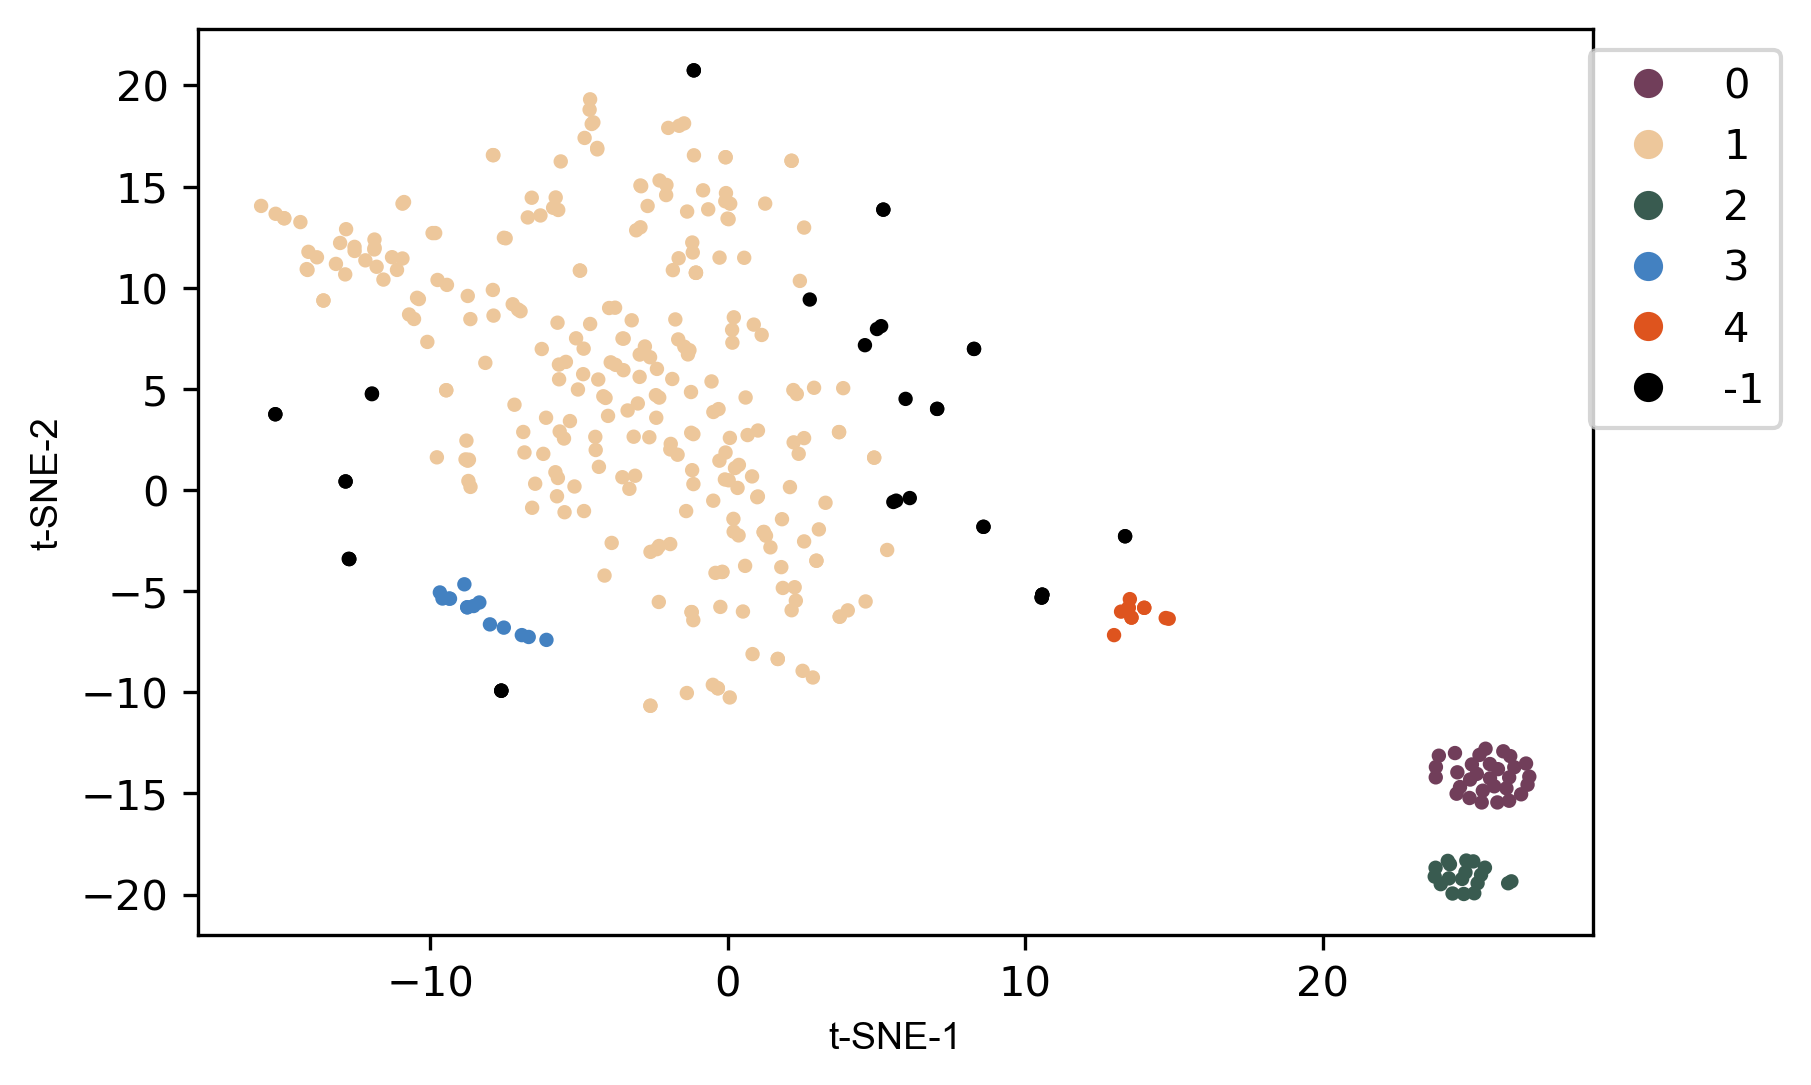

In [33]:
'''
Parâmetros
* Número mínimo de amostras: 10
* Distância Máxima: 3
* Métrica: Euclidiana
*  Taxa de aprendizado: 368
*  N de Interações: 2500
'''
Image("tsne_2d.png", width=1000, height=600)

In [9]:
# Variação dos parâmetros para testes
'''
Parâmetros
* Taxa de aprendizado: 468
* 2500 interações
* Número mínimo de amostras: 10
* Distância Máxima: 3
* Métrica: Euclidiana
'''
#Image("468ninter2500.png", width=1000, height=600)

'''
Parâmetros:
* Métrica: CityBlock
* Taxa de Aprendizado: 368
* N de Interações: 2000
* Número mínimo de amostras: 10
* Distância Máxima: 3
'''
#Image("cityblock.png", width=1000, height=600)
  
'''
Parâmetros:
* Taxa de Aprendizado: 368
* N de Interações: 2000
* Métrica Euclidiana
* Número min de amostras: 15
* Distância Máxima: 4
'''
#Image("15samples4eps.png", width=1000, height=600)

'''
Parâmetros:
* Número mínimo de amostras: 10
* Distância Máxima: 3
* Métrica: Euclidiana
* Taxa de Aprendizado: 300
* Numero de Interações: 1000
'''
#Image("learning_rate300ninter1000.png", width=1000, height=600)


# Recolocando colunas indicando papel, setor, subsetor e cotação.
Categorias = pd.DataFrame({'Categorias': get_clusters})
df2['Categorias']= get_clusters
df2[['Categorias','Papel', 'Setor','Subsetor','Cotacao']].sort_values('Categorias')

# Renomear os clusters
Ruido = df2.loc[df2['Categorias'] == -1]
Cat_A = df2.loc[df2['Categorias'] == 0]
Cat_B = df2.loc[df2['Categorias'] == 1]
Cat_C = df2.loc[df2['Categorias'] == 2]
Cat_D = df2.loc[df2['Categorias'] == 3]
Cat_E = df2.loc[df2['Categorias'] == 4]

ruido = pd.DataFrame({'Categoria': 'Ruido', 'Papeis':Ruido.Papel.to_list(), 'Subsetor':Ruido.Subsetor.to_list()})
cat_a = pd.DataFrame({'Categoria': 'A', 'Papeis':Cat_A.Papel.to_list(), 'Subsetor':Cat_A.Subsetor.to_list()})
cat_b = pd.DataFrame({'Categoria': 'B', 'Papeis':Cat_B.Papel.to_list(), 'Subsetor':Cat_B.Subsetor.to_list()})
cat_c = pd.DataFrame({'Categoria': 'C', 'Papeis':Cat_C.Papel.to_list(), 'Subsetor':Cat_C.Subsetor.to_list()})
cat_d = pd.DataFrame({'Categoria': 'D', 'Papeis':Cat_D.Papel.to_list(), 'Subsetor':Cat_D.Subsetor.to_list()})
cat_e = pd.DataFrame({'Categoria': 'E', 'Papeis':Cat_E.Papel.to_list(), 'Subsetor':Cat_E.Subsetor.to_list()})

print(ruido.shape)
print(cat_a.shape)
print(cat_b.shape)
print(cat_c.shape)
print(cat_d.shape)
print(cat_e.shape)

(48, 3)
(30, 3)
(254, 3)
(18, 3)
(17, 3)
(11, 3)


# **Regressão e ranking de indicadores**

In [ ]:
#prediction multiple steps
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# Função de importação de séries históricas e cálculo de indicadores EMAs, SMAs, ATR, CCI, ROC, RSI e WCL
def import_and_prepare_paper(paper, columns_name=None, verbose=False):
  temp_df = yf.download(f"{paper}.SA")
  print(f"Papel: {paper}")
  temp_df = temp_df.reset_index()
  temp_df = temp_df[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']]
  df = temp_df

  lista = [10,20,50,100,200]
  for x in lista:
    df[f'EMA_{x}'] = df.Close.ewm(span=x).mean().fillna(0)
    df[f'SMA_{x}'] = ti.sma.get_value_list(df.Close ,x)
  df['ATR'] = ti.atr.get_value_list(df.High,df.Low,df.Close)
  df['CCI'] = ti.cci.get_value_list(df.High,df.Low,df.Close)
  df['ROC'] = ti.roc.get_value_list(df.Close)
  df['RSI'] = ti.rsi.get_value_list(df.Close)
  df['WCL'] = ti.wcl.get_value_list(df.High, df.Low, df.Close)

  with pd.option_context('mode.use_inf_as_null', True):
    df = df.dropna()

  df_aux = df.drop(['Close'],axis=1)
  df_aux['Close'] = temp_df[['Close']]
  temp_df = df_aux

  if verbose:
    print(df)
  min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
  df = min_max_scaler.fit_transform(df_aux)
  if verbose:
    print(df)

  return df, temp_df

In [ ]:
# Processo de treinamento, teste, definição dos modelos de regressão e criação da base final 
# para observação e extração de informações

metrics = {}
count = 63
papeis = info_papel_fit_no_missing_table.Papel

# Percorre todos os 378 papéis
for a in papeis:
  df, temp_df = import_and_prepare_paper(a)
  df1=df
  train_size = int(len(df1) * 0.70)
  test_size = len(df1) - train_size
  train, test = df1[0:train_size,:], df1[train_size:len(df1),:]
  # choose a number of time steps
  n_steps_in, n_steps_out = 10, 1
  # convert into input/output
  x_train1, y_train = split_sequences(train, n_steps_in, n_steps_out)
  x_test1, y_test = split_sequences(test, n_steps_in, n_steps_out)
  # flatten input
  n_input = x_train1.shape[1] * x_train1.shape[2]
  x_train = x_train1.reshape((x_train1.shape[0], n_input))
  #definir modelo
  model = Sequential()
  model.add(Dense(300, activation='relu', input_dim=n_input))
  model.add(Dense(n_steps_out))
  model.compile(optimizer='adam', loss='mse')
  # desfazer normalização
  #precisa rodar para cada um dos papeis 1x
  min_max_scaler1 = preprocessing.MinMaxScaler(feature_range = (0,1))
  df_suporte = min_max_scaler1.fit_transform(temp_df[['Close']])
  print(count)
  count = count - 1

  # Percorre o range escolhido para obter scores RMSE de regressão com todos os indicadores
  # e avaliação dos indicadores com o RandomForestRegressor
  for x in range(0,2):

    if f'RMSE_{x}' not in metrics:
      metrics[f'RMSE_{x}'] = list()
    
    # treinamento
    model.fit(x_train, y_train, epochs=500, verbose=0)

    # flatten input
    n_input_test = x_test1.shape[1] * x_test1.shape[2]
    x_test = x_test1.reshape((x_test1.shape[0], n_input_test))

    trainPredict = model.predict(x_train)
    testPredict = model.predict(x_test)

    # invert predictions
    train_Predict = min_max_scaler1.inverse_transform(trainPredict)
    trainY = min_max_scaler1.inverse_transform(y_train)
    test_Predict = min_max_scaler1.inverse_transform(testPredict)
    # print(test_Predict)
    testY = min_max_scaler1.inverse_transform(y_test)

    # calculate root mean squared error
    testScore = math.sqrt(mean_squared_error(testY[0], test_Predict[0,:]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    #salvar metrica
    metrics[f'RMSE_{x}'].append(testScore)

    # fit random forest model
    model1 = RandomForestRegressor(n_estimators=500, random_state=1)
    model1.fit(x_train[:,0:20], y_train.ravel())

    # plot importance scores
    names = temp_df.columns.values[0:-1]
    ticks = [i for i in range(len(names))]
    '''
    plt.figure(figsize=(20, 6))
    plt.bar(ticks, model1.feature_importances_)
    plt.xticks(ticks, names)
    plt.show()
    '''
  #seleciona % das melhores features 
  array_ = np.array(model1.feature_importances_)
  ind = array_.argsort()[-5:][::-1]
  columns= temp_df.columns.values[0:-1][ind]
  columns =columns.tolist()
  print(columns)

  # get filtered dataframe
  df2 = temp_df.filter(columns, axis=1)
  df2['Close'] = temp_df['Close']

  #run new prediction with the filtered dataframe
  min_max_scaler2 = preprocessing.MinMaxScaler(feature_range = (0,1))
  df3 = min_max_scaler2.fit_transform(df2)
  train_size = int(len(df3) * 0.70)
  test_size = len(df3) - train_size
  train, test = df3[0:train_size,:], df3[train_size:len(df3),:]

  # convert into input/output
  x_train1, y_train = split_sequences(train, n_steps_in, n_steps_out)
  x_test1, y_test = split_sequences(test, n_steps_in, n_steps_out)
  # flatten input
  n_input = x_train1.shape[1] * x_train1.shape[2]
  x_train = x_train1.reshape((x_train1.shape[0], n_input))
  #definir modelo

  model3 = Sequential()
  model3.add(Dense(300, activation='relu', input_dim=n_input))
  model3.add(Dense(n_steps_out))
  model3.compile(optimizer='adam', loss='mse')

  min_max_scaler3 = preprocessing.MinMaxScaler(feature_range = (0,1))
  df_suporte = min_max_scaler3.fit_transform(temp_df[['Close']])

  # Verifica se determinada coluna de indicador técnico já existe na tabela, 
  # e marca 1 se estiver no top 5 (25%) do papel e 0 caso contrário.
  for col in temp_df.columns:
    if col not in metrics:
      metrics[col] = list()
    if col in columns:
      metrics[col].append(1)
    else:
      metrics[col].append(0)

  # Percorre o range escolhido para obter scores RMSE de regressão com somente os 5 (25%) indicadores
  # melhores avaliados pelo RandomForestRegressor
  for x in range(0,2):
    if f'RMSE2_{x}' not in metrics:
      metrics[f'RMSE2_{x}'] = list()

    # treinamento
    model3.fit(x_train, y_train, epochs=500, verbose=0)

    # flatten input
    n_input_test = x_test1.shape[1] * x_test1.shape[2]
    x_test = x_test1.reshape((x_test1.shape[0], n_input_test))

    trainPredict2 = model3.predict(x_train)
    testPredict2 = model3.predict(x_test)
    
    # invert predictions
    test_Predict2 = min_max_scaler3.inverse_transform(testPredict2)
    testY2 = min_max_scaler3.inverse_transform(y_test)

    # calculate root mean squared error
    testScore = math.sqrt(mean_squared_error(testY2[0], test_Predict2[0,:]))
    print('Test Score: %.2f RMSE' % (testScore))
    metrics[f'RMSE2_{x}'].append(testScore)

2021-05-12 00:30:30,401 [utils._init_num_threads] INFO: NumExpr defaulting to 2 threads.


[*********************100%***********************]  1 of 1 completed
Papel: GSHP3
63
Test Score: 0.05 RMSE
Test Score: 0.31 RMSE
['SMA_20', 'Adj Close', 'WCL', 'High', 'Low']
Test Score: 0.39 RMSE
Test Score: 0.39 RMSE
[*********************100%***********************]  1 of 1 completed
Papel: GUAR3
62
Test Score: 0.01 RMSE
Test Score: 0.06 RMSE
['Adj Close', 'Low', 'WCL', 'Open', 'High']
Test Score: 0.06 RMSE
Test Score: 0.07 RMSE
[*********************100%***********************]  1 of 1 completed
Papel: HAGA3
61
Test Score: 0.00 RMSE
Test Score: 0.01 RMSE
['Low', 'Open', 'RSI', 'Adj Close', 'WCL']
Test Score: 0.02 RMSE
Test Score: 0.02 RMSE
[*********************100%***********************]  1 of 1 completed
Papel: HAGA4
60
Test Score: 0.01 RMSE
Test Score: 0.00 RMSE
['High', 'Adj Close', 'EMA_200', 'WCL', 'Low']
Test Score: 0.00 RMSE
Test Score: 0.00 RMSE
[*********************100%***********************]  1 of 1 completed
Papel: HBOR3
59
Test Score: 0.04 RMSE
Test Score: 0.06 RMSE

In [ ]:
# Extrai o dicionário com os resultados e armazena em um arquivo csv.
df_metrics = pd.DataFrame.from_dict(metrics)
df_metrics.insert(0, 'Papel', papeis.to_list())
#df_metrics.to_csv('/metrics.csv')

In [13]:
complete_df = pd.read_csv('info_papel_fit_no_missing_table.csv')

# A regressão foi realizada separadamente em diferentes plataformas paralelamente, por conta do alto tempo de processamento
# para 378 papéis.

# Unir todos os arquivos processados paralelamente.

df1 = complete_df.loc[0:50]
metrics_df1 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_0_50.csv')
metrics_df1['Setor'] = df1['Setor'].to_list()
metrics_df1['Subsetor'] = df1['Subsetor'].to_list()

df2 = complete_df.loc[51:99]
metrics_df2 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_51_100.csv')
metrics_df2 = metrics_df2[:len(metrics_df2)-1]
metrics_df2['Papel'] = df2['Papel'].to_list()
metrics_df2['Setor'] = df2['Setor'].to_list()
metrics_df2['Subsetor'] = df2['Subsetor'].to_list()

df3 = complete_df.loc[100:126]
metrics_df3 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_100_127.csv')
metrics_df3 = metrics_df3[:len(metrics_df3)-1]
metrics_df3['Papel'] = df3['Papel'].to_list()
metrics_df3['Setor'] = df3['Setor'].to_list()
metrics_df3['Subsetor'] = df3['Subsetor'].to_list()

df4 = complete_df.loc[127:190]
metrics_df4 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_127_190.csv')
metrics_df4['Papel'] = df4['Papel'].to_list()
metrics_df4['Setor'] = df4['Setor'].to_list()
metrics_df4['Subsetor'] = df4['Subsetor'].to_list()

df5 = complete_df.loc[191:252]
metrics_df5 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_191_252.csv')
metrics_df5['Papel'] = df5['Papel'].to_list()
metrics_df5['Setor'] = df5['Setor'].to_list()
metrics_df5['Subsetor'] = df5['Subsetor'].to_list()

df6 = complete_df.loc[253:337]
metrics_df6 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_253_337.csv')
metrics_df6['Papel'] = df6['Papel'].to_list()
metrics_df6['Setor'] = df6['Setor'].to_list()
metrics_df6['Subsetor'] = df6['Subsetor'].to_list()

df7 = complete_df.loc[338:378]
metrics_df7 = pd.read_csv('/content/drive/My Drive/Master/MD/Data_Finance/metrics_338_378.csv')
metrics_df7['Papel'] = df7['Papel'].to_list()
metrics_df7['Setor'] = df7['Setor'].to_list()
metrics_df7['Subsetor'] = df7['Subsetor'].to_list()

metrics_df = metrics_df1
metrics_df = metrics_df.append(metrics_df2)
metrics_df = metrics_df.append(metrics_df3)
metrics_df = metrics_df.append(metrics_df4)
metrics_df = metrics_df.append(metrics_df5)
metrics_df = metrics_df.append(metrics_df6)
metrics_df = metrics_df.append(metrics_df7)

metrics_df = metrics_df.set_index('Papel')
metrics_df = metrics_df.reset_index()

#Armazena os resultados em um arquivo
#metrics_df.to_csv('metrics_df_all.csv')

metrics_df.sort_values(by=['Setor'])

# Tratamento para visualização.
indicators_by_section_df1 = indicators_by_section_df[['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close']]
indicators_by_section_df1.sort_values(by=['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close'], inplace=True, ascending=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Master/MD/Data_Finance/metrics_0_50.csv'

In [24]:
# Agrupamento por setor
metrics_df = pd.read_csv('metrics_df_all_cat_cluster.csv')

indicators_by_section_df2 = metrics_df[['Papel','Setor']].groupby('Setor').count()
indicators_by_section_df = metrics_df.groupby('Setor').sum()
indicators_by_section_df['nPapeis'] = indicators_by_section_df2['Papel']

indicators_by_section_df1 = indicators_by_section_df[['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close']]
indicators_by_section_df1.sort_values(by=['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close'], inplace=True, ascending=False)


<ipython-input-24-9606c2d87c2a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Agrupamento por cluster
metrics_df = pd.read_csv('metrics_df_all_cat_cluster.csv')

indicators_by_section_df2 = metrics_df[['Papel','Cat_Cluster']].groupby('Cat_Cluster').count()
indicators_by_section_df = metrics_df.groupby('Cat_Cluster').sum()
indicators_by_section_df['nPapeis'] = indicators_by_section_df2['Papel']

indicators_by_section_df3 = indicators_by_section_df[['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close']]
indicators_by_section_df3.sort_values(by=['nPapeis','Open', 'High', 'Low', 'Adj Close', 'Volume', 'EMA_10', 'SMA_10', 'EMA_20', 'SMA_20', 'EMA_50', 'SMA_50', 'EMA_100', 'SMA_100', 'EMA_200', 'SMA_200', 'ATR', 'CCI', 'ROC', 'RSI', 'WCL', 'Close'], inplace=True, ascending=False)


<ipython-input-22-dfe7ab0564f5>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Resultados das regressões e do ranking

In [25]:
metrics_df_all = pd.read_csv('metrics_df_all.csv')

# Resultado total das regressões para cada papel, com os RMSE por rodada RMSE_X para todos os indicadores
# e RMSE2_X para o top 5 (25%) de indicadores. Mais os indicadores usados na etapa 2 de regressão.
metrics_df_all

,Unnamed: 0,Papel,Unnamed: 0.1,RMSE_0,RMSE_1,Open,High,Low,Adj Close,Volume,...,ATR,CCI,ROC,RSI,WCL,Close,RMSE2_0,RMSE2_1,Setor,Subsetor
0,0,ABCB4,0,0.053194,0.065454,0,1,1,1,0,...,0,0,0,0,1,0,0.183390,0.344948,Intermediários Financeiros,Bancos
1,1,ABEV3,1,0.247704,0.002550,0,0,0,0,0,...,0,0,0,0,0,0,0.644970,0.629587,Bebidas,Cervejas e Refrigerantes
2,2,ADHM3,2,0.047199,0.041534,0,1,0,1,0,...,0,0,0,0,1,0,0.023947,0.004018,NaN,NaN
3,3,AELP3,3,0.023046,0.218181,1,1,1,0,0,...,0,0,0,0,1,0,0.027400,0.035275,Energia Elétrica,Energia Elétrica
4,4,AFLT3,4,1.769845,9.896832,1,1,1,1,0,...,0,0,0,0,1,0,7.836435,6.356154,Energia Elétrica,Energia Elétrica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,373,WHRL3,35,0.001413,0.008811,0,1,0,0,0,...,0,0,0,0,0,0,0.031025,0.025294,Utilidades Domésticas,Eletrodomésticos
374,374,WHRL4,36,0.018858,0.010042,0,1,1,1,0,...,0,0,0,0,1,0,0.041929,0.003758,Utilidades Domésticas,Eletrodomésticos
375,375,WLMM4,37,0.960898,0.964919,1,1,1,1,0,...,0,0,0,0,1,0,1.209403,2.684346,Comércio,Material de Transporte
376,376,WSON33,38,0.186245,0.207264,0,0,1,1,0,...,0,0,0,0,1,0,0.451885,0.320446,Transporte,Serviços de Apoio e Armazenagem


In [51]:
# Agrupamento por Cluster
indicators_by_section_df3

,nPapeis,Open,High,Low,Adj Close,Volume,EMA_10,SMA_10,EMA_20,SMA_20,EMA_50,SMA_50,EMA_100,SMA_100,EMA_200,SMA_200,ATR,CCI,ROC,RSI,WCL,Close
Cat_Cluster,,,,,,,,,,,,,,,,,,,,,,
B,246,126,169,170,155,1,95,41,27,21,24,21,35,32,47,50,3,2,4,4,203,0
R,58,32,45,41,34,1,21,4,10,8,6,5,6,6,9,7,0,2,1,3,49,0
A,30,16,21,22,13,0,14,6,5,3,6,4,1,2,3,6,1,0,1,1,25,0
C,18,11,14,12,13,0,9,2,2,2,0,0,2,3,3,3,1,0,0,0,13,0
D,15,9,12,12,6,0,4,5,1,1,1,2,1,1,4,1,1,0,0,0,14,0
E,11,6,9,8,7,0,3,2,2,1,0,1,1,1,1,2,1,0,0,0,10,0


In [38]:
# Agrupamento por Setor
indicators_by_section_df1

,nCat_Cluster,nPapeis,Open,High,Low,Adj Close,Volume,EMA_10,SMA_10,EMA_20,SMA_20,EMA_50,SMA_50,EMA_100,SMA_100,EMA_200,SMA_200,ATR,CCI,ROC,RSI,WCL,Close
Setor,,,,,,,,,,,,,,,,,,,,,,,
Energia Elétrica,65,65,33,45,37,37,0,34,7,9,5,8,5,10,11,14,16,1,1,1,0,51,0
Intermediários Financeiros,37,37,21,26,28,18,0,20,6,5,4,6,3,1,2,4,7,1,0,1,1,31,0
"Tecidos, Vestuário e Calçados",27,27,11,15,11,16,0,14,6,8,3,4,3,4,4,5,6,2,0,0,2,21,0
Comércio,16,16,10,13,14,11,0,4,1,0,3,1,2,1,2,2,2,0,0,0,0,14,0
Construção Civil,16,16,6,12,14,8,0,5,3,2,1,1,2,1,1,5,4,0,0,0,0,15,0
Siderurgia e Metalurgia,15,15,12,14,14,6,0,6,5,1,1,0,0,0,0,0,1,0,0,0,0,15,0
Exploração de Imóveis,15,15,10,10,11,7,0,7,2,1,1,1,2,2,0,1,4,1,0,0,1,14,0
Máquinas e Equipamentos,14,14,5,11,11,10,0,4,2,2,1,2,0,3,2,1,3,1,0,1,0,11,0
Previdência e Seguros,13,13,7,9,10,8,0,2,3,3,1,2,1,2,1,2,2,1,0,0,0,11,0


In [7]:
# Bloco para rodar no Colab
#dtale_app.USE_NGROK = True

# Bloco para rodar no Jupyter
dtale_app.USE_NGROK = False

describe = indicators_by_section_df3.iloc[:,6:]
#describe = indicators_by_section_df1.iloc[3:7,6:]

# Utilização da biblioteca dTale para analise dos resultados.
d_tale_page  = dtale.show(describe, ignore_duplicate=True)
d_tale_page

2021-05-13 12:10:55,352 - INFO     - NumExpr defaulting to 8 threads.
